In [14]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
dat = pd.read_csv('/Users/victoriashi/Downloads/us-covid-imputed-data.csv', parse_dates=True)
# 01/22/20 like date format
dat['date'] = pd.to_datetime(dat['date'], format='%m/%d/%y')

In [16]:
dat.head()

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,2020-01-22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
1,2020-01-23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
2,2020-01-24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
3,2020-01-25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
4,2020-01-26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048


In [17]:
dat.columns

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade', 'daily_state_test',
       'precipitation', 'temperature', 'virus_pressure', 'total_population',
       'female_percent', 'area', 'population_density', 'latitude', 'longitude',
       'hospital_beds_ratio', 'ventilator_capacity_ratio', 'icu_beds_ratio',
       'houses_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'total_college_population', 'percent_smokers', 'percent_diabetes',
       'Religious_congregation_ratio', 'political_party', 'airport_distance',
       'passenger_load_ratio', 'meat_plants', 'median_household_income',
       'percent_insured', 'deaths_per_100000', 'gdp_per_capita', 'age_0_4',
       'age_5_9', 'age_10_14', 'age_15_19', 'age_20_24', 'age_25_29',
 

In [18]:
#extract month and year from date
dat['month'] = dat['date'].dt.month
dat['year'] = dat['date'].dt.year

In [19]:
# aggregate by the column state_name and produce a new dataframe
dat_state = dat.groupby('state_name')
dat.drop('county_name', axis=1, inplace=True)

In [20]:
dat.head()

,date,county_fips,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,daily_state_test,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,month,year
0,2020-01-22,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
1,2020-01-23,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
2,2020-01-24,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
3,2020-01-25,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020
4,2020-01-26,1003,1,Alabama,0.0,0.0,F,F,F,0.0,...,7,7,6,4,3,2,2,0.021048,1,2020


Text(0.5, 1.0, 'IL Confirmed Cases 2020')

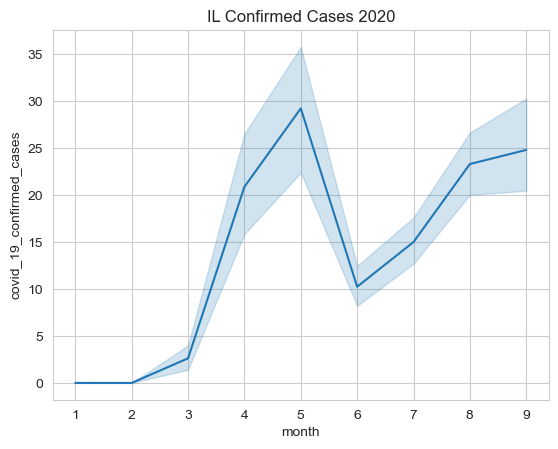

In [38]:
# find Illinois information
dat_illinois = dat[dat['state_name'] == 'Illinois']
# reindex using date
dat_illinois.set_index('date', inplace=True)
# create a year column from index
dat_illinois['year'] = dat_illinois.index.year
IL2020 = dat_illinois[dat_illinois['year'] == 2020]
# plot 2020 and 2021 side by side
sns.lineplot(data=IL2020, x='month', y='covid_19_confirmed_cases').set_title('IL Confirmed Cases 2020')

Text(0.5, 1.0, 'IL ICU Beds 2020')

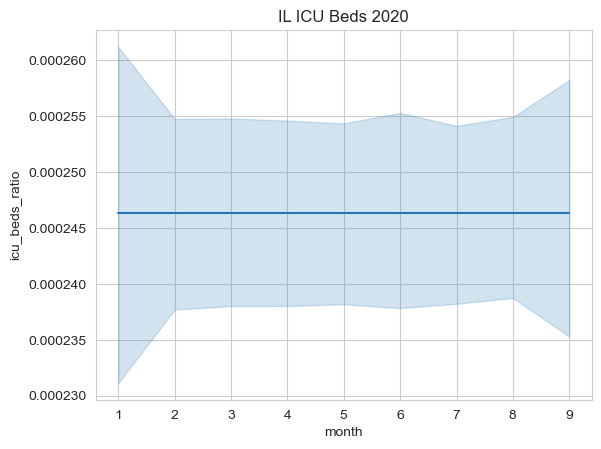

In [46]:
# plot number of icu bed ratio over month
sns.lineplot(data=IL2020, x='month', y='icu_beds_ratio').set_title('IL ICU Beds 2020')

In [ ]:
sns.scatterplot(dat, x = 'icu_beds_ratio', y='covid_19_confirmed_cases')

In [12]:
# plot the total number of covid_19_confirmed_cases by age_group


ValueError: Could not interpret input 'age_group'